# 1. Annual Returns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import scipy.stats as stats
data_path = pathlib.Path(r'Preprocessed Data')

from annual_calculations import *
from long_term_simulations import *
from trade_simulations import *

df = pd.read_csv(data_path / 'SP500_whole.csv').set_index("Date")
df_gold = pd.read_csv(data_path / "Gold_prices.csv")

## 1.1. Annual Returns of SP500 Index

In [2]:
annual_returns_stocks = compute_annual_returns_stocks(df)
annual_returns_stocks.head(10)

100%|██████████| 73/73 [00:00<00:00, 1817.51it/s]


,(%)Adjusted_Annual_Return_Without_Dividends,(%)Adjusted_Annual_Return_With_Dividends
Period,,
"(1950, 1951)",12.466000,19.906000
"(1951, 1952)",7.265190,13.285190
"(1952, 1953)",0.171181,5.581181
"(1953, 1954)",19.783523,25.623523
"(1954, 1955)",36.757653,41.157653
"(1955, 1956)",13.469018,17.079018
"(1956, 1957)",-7.802313,-4.052313
"(1957, 1958)",1.127990,5.567990
"(1958, 1959)",22.995720,26.265720


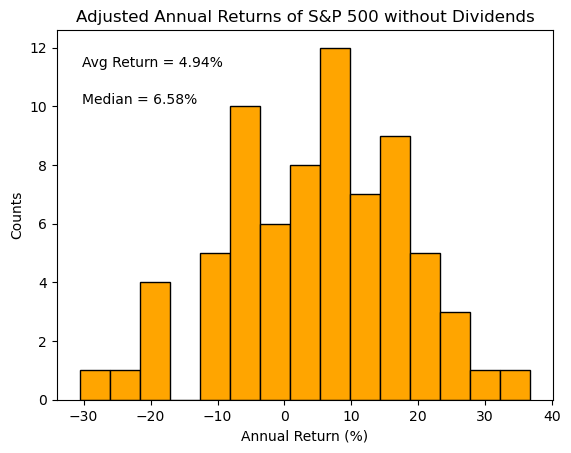

In [3]:
nominal_returns = plt.hist(annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"], bins = 15,edgecolor = 'black',color='orange')
plt.xlabel("Annual Return (%)")
plt.title("Adjusted Annual Returns of S&P 500 without Dividends")
plt.text(0.05, 0.9, f'Avg Return = {annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.05, 0.8, f'Median = {annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

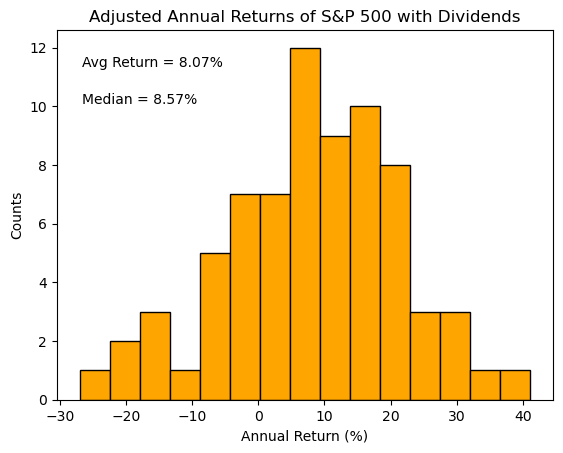

In [4]:
real_returns = plt.hist(annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"], bins = 15,edgecolor = 'black',color='orange')
plt.xlabel("Annual Return (%)")
plt.title("Adjusted Annual Returns of S&P 500 with Dividends")
plt.text(0.05, 0.9, f'Avg Return = {annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.05, 0.8, f'Median = {annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

## 1.2. Annual Returns of Gold

In [5]:
annual_returns_gold = compute_annual_returns_commodity(df_gold)
annual_returns_gold.head(10)

  0%|          | 0/73 [00:00<?, ?it/s]

100%|██████████| 73/73 [00:00<00:00, 2218.12it/s]


,(%)Adjusted_Annual_Return
Period,
"(1950, 1951)",-4.096305
"(1951, 1952)",-6.213021
"(1952, 1953)",-6.351333
"(1953, 1954)",-5.195711
"(1954, 1955)",-0.123411
"(1955, 1956)",-1.540567
"(1956, 1957)",-3.099652
"(1957, 1958)",-2.664618
"(1958, 1959)",-1.027397


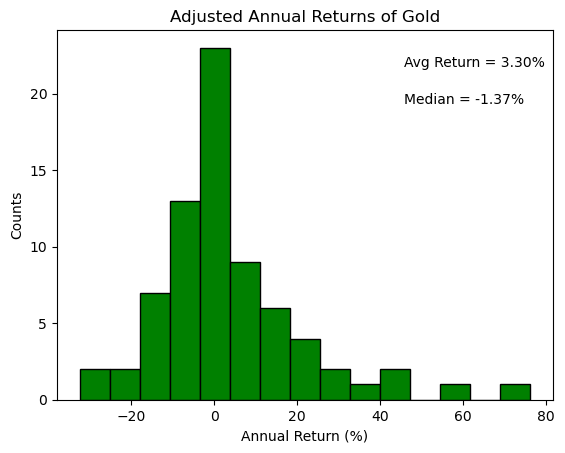

In [6]:
real_returns_gold = plt.hist(annual_returns_gold["(%)Adjusted_Annual_Return"], bins = 15,edgecolor = 'black',color='green')
plt.xlabel("Annual Return (%)")
plt.title("Adjusted Annual Returns of Gold")
plt.text(0.7, 0.9, f'Avg Return = {annual_returns_gold["(%)Adjusted_Annual_Return"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.7, 0.8, f'Median = {annual_returns_gold["(%)Adjusted_Annual_Return"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

## 1.3. Statistical Comparison

In [7]:
stats.wilcoxon(annual_returns_gold["(%)Adjusted_Annual_Return"],
               annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"])

WilcoxonResult(statistic=1089.0, pvalue=0.15054448663037195)

In [8]:
stats.wilcoxon(annual_returns_gold["(%)Adjusted_Annual_Return"],
               annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"])

WilcoxonResult(statistic=922.0, pvalue=0.018487704692062207)

In [9]:
stats.ttest_rel(annual_returns_stocks["(%)Adjusted_Annual_Return_With_Dividends"],
                annual_returns_stocks["(%)Adjusted_Annual_Return_Without_Dividends"])

TtestResult(statistic=19.79475780467871, pvalue=7.625949828755602e-31, df=72)

# 2. ETF Simulations

## 2.1. Long Term Investment - Stocks

In [10]:
# a single sample is enough because of the low variation between data points
long_term_investment_results = simulate_twenty_years_of_investment(df, sample_size=1)
long_term_investment_results.tail(10)

100%|██████████| 54/54 [00:00<00:00, 79.02it/s]


,Period,Capital Invested,Portfolio Value,Capital Gained,Capital Invested Adjusted,Portfolio Value Adjusted,% Change w.o. Dividend,% Change with Dividend,Real Returns
44,"(1994, 2014)",927.507996,5434.210102,4506.702106,1906.961447,6995.368897,157.981772,266.833263,3012.651491
45,"(1995, 2015)",1067.540003,5636.030212,4568.490210,2134.379520,7245.984834,140.293414,239.489054,2994.393886
46,"(1996, 2016)",1337.401989,5811.841715,4474.439726,2597.236368,7378.617378,100.559121,184.094951,2611.758075
47,"(1997, 2017)",1729.712012,6759.400541,5029.688529,3283.758567,8403.057303,80.295672,155.897537,2636.716005
48,"(1998, 2018)",2132.633996,7544.369417,5411.735420,3986.586372,9154.796341,61.245053,129.639985,2441.586939
49,"(1999, 2019)",2731.844019,8454.652710,5722.808691,4996.355777,10074.824719,40.394489,101.643461,2018.252408
50,"(2000, 2020)",2835.846021,9066.327655,6230.481634,5017.899434,10674.304623,47.280453,112.724563,2372.485604
51,"(2001, 2021)",2492.345972,12618.725564,10126.379592,4288.073504,14187.917636,129.687597,230.869273,5561.099478
52,"(2002, 2022)",2019.619995,11749.411189,9729.791194,3420.668218,12231.108948,148.958014,257.564902,5095.359451
53,"(2003, 2023)",1910.162000,11936.714752,10026.552753,3163.186746,11936.714752,163.279414,277.363580,5164.832773


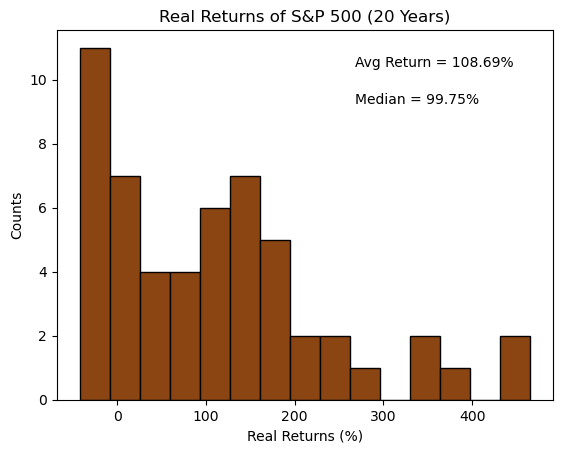

In [11]:
twenty_sp = plt.hist(long_term_investment_results["% Change w.o. Dividend"], bins = 15,edgecolor = 'black',color='saddlebrown')
plt.xlabel("Real Returns (%)")
plt.title("Real Returns of S&P 500 (20 Years)")
plt.text(0.6, 0.9, f'Avg Return = {long_term_investment_results["% Change w.o. Dividend"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Median = {long_term_investment_results["% Change w.o. Dividend"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

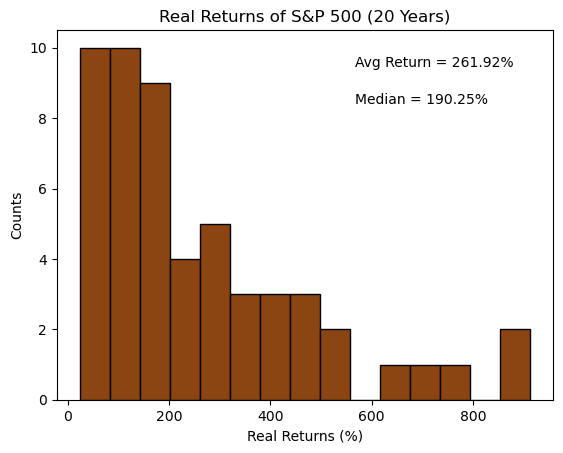

In [12]:
plt.hist(long_term_investment_results["% Change with Dividend"], bins = 15,edgecolor = 'black',color='saddlebrown')
plt.xlabel("Real Returns (%)")
plt.title("Real Returns of S&P 500 (20 Years)")
plt.text(0.6, 0.9, f'Avg Return = {long_term_investment_results["% Change with Dividend"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Median = {long_term_investment_results["% Change with Dividend"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

## 2.2. Long Term Investment - Gold

In [13]:
long_term_investment_results_gold = simulate_twenty_years_of_investment_gold(df_gold, sample_size=30)
long_term_investment_results_gold.tail(10)

100%|██████████| 54/54 [00:00<00:00, 162.33it/s]


,Period,Capital Invested,Portfolio Value,Capital Gained,Capital Invested Adjusted,Portfolio Value Adjusted,% Change
1610,"(2003, 2023)",709.4,3886.006693,3176.606693,1174.750978,3886.006693,230.794080
1611,"(2003, 2023)",739.0,3886.006693,3147.006693,1223.767935,3886.006693,217.544412
1612,"(2003, 2023)",707.9,3886.006693,3178.106693,1172.267011,3886.006693,231.495014
1613,"(2003, 2023)",766.5,3886.006693,3119.506693,1269.307337,3886.006693,206.151755
1614,"(2003, 2023)",712.6,3886.006693,3173.406693,1180.050109,3886.006693,229.308617
1615,"(2003, 2023)",705.1,3886.006693,3180.906693,1167.630272,3886.006693,232.811403
1616,"(2003, 2023)",817.5,3886.006693,3068.506693,1353.762228,3886.006693,187.052380
1617,"(2003, 2023)",821.6,3886.006693,3064.406693,1360.551739,3886.006693,185.619913
1618,"(2003, 2023)",817.5,3886.006693,3068.506693,1353.762228,3886.006693,187.052380
1619,"(2003, 2023)",722.8,3886.006693,3163.206693,1196.941087,3886.006693,224.661484


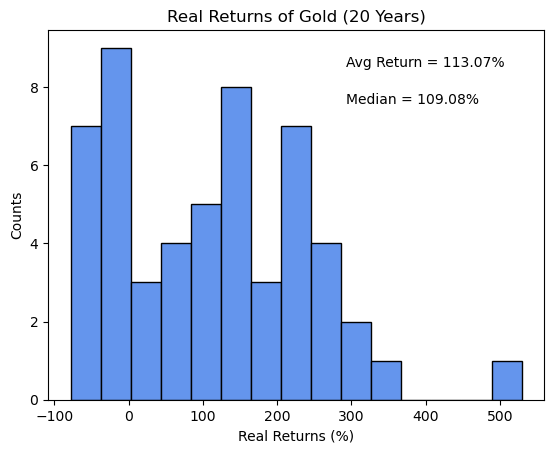

In [14]:
mean_returns_gold = pd.DataFrame(long_term_investment_results_gold.groupby("Period")["% Change"].mean())
twenty_gold = plt.hist(mean_returns_gold["% Change"], bins = 15, edgecolor = 'black',color = "cornflowerblue")
plt.xlabel("Real Returns (%)")
plt.title("Real Returns of Gold (20 Years)")
plt.text(0.6, 0.9, f'Avg Return = {mean_returns_gold["% Change"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Median = {mean_returns_gold["% Change"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

# 2.3. Statistical Comparison

In [15]:
test_results = pd.DataFrame(
    data = [
        stats.wilcoxon(mean_returns_gold["% Change"].values,long_term_investment_results["% Change w.o. Dividend"].values),
        stats.wilcoxon(mean_returns_gold["% Change"].values,long_term_investment_results["% Change with Dividend"].values),
        stats.wilcoxon(long_term_investment_results["% Change w.o. Dividend"].values,long_term_investment_results["% Change with Dividend"].values)
    ],
    columns = ["Test Statistics","p-value"],
    index = ["Gold vs SP500 w.o. Div",
             "Gold vs SP500 Div",
             "SP500 w.o. Div vs SP500 Div"]
)
test_results

,Test Statistics,p-value
Gold vs SP500 w.o. Div,697.0,6.952319e-01
Gold vs SP500 Div,447.0,1.094909e-02
SP500 w.o. Div vs SP500 Div,0.0,1.625698e-10


# 3. Trading

<Figure size 640x480 with 0 Axes>

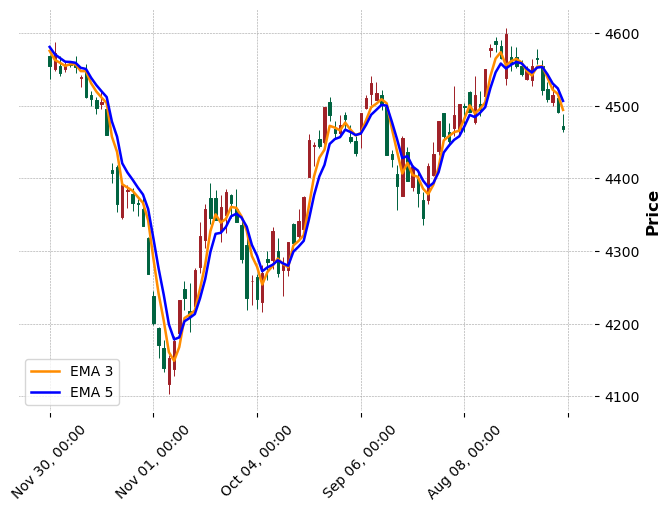

In [16]:
#display simulation
plot_df = pd.read_csv(r"Raw Data\SPX500 (2014-2023).csv")
display_EMA(plot_df)

## 3.1. Trading Stocks

### 3.1.1. Trading Simulations

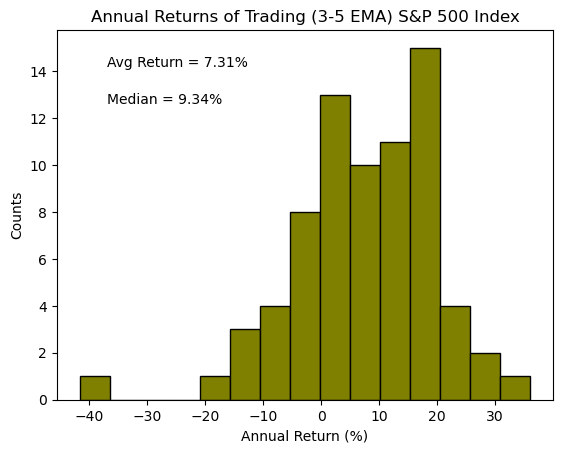

In [17]:
trade_results_35 =  simulate_trade_EMA(df,verbose=False,EMA1 = 3,EMA2 = 5)
plt.hist(x = trade_results_35["(%)Annual_Return_Without_Dividends"], bins = 15,edgecolor = 'black',color='olive')
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (3-5 EMA) S&P 500 Index")
plt.text(0.1, 0.9, f'Avg Return = {trade_results_35["(%)Annual_Return_Without_Dividends"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'Median = {trade_results_35["(%)Annual_Return_Without_Dividends"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

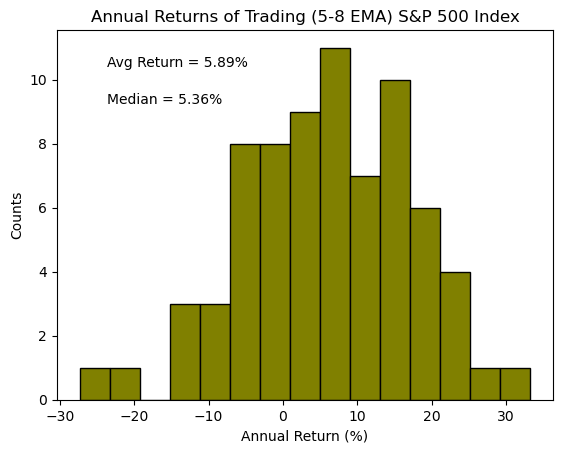

In [18]:
trade_results_58 =  simulate_trade_EMA(df,verbose=False,EMA1=5,EMA2=8)
plt.hist(x = trade_results_58["(%)Annual_Return_Without_Dividends"], bins = 15,edgecolor = 'black',color='olive')
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (5-8 EMA) S&P 500 Index")
plt.text(0.1, 0.9, f'Avg Return = {trade_results_58["(%)Annual_Return_Without_Dividends"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'Median = {trade_results_58["(%)Annual_Return_Without_Dividends"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

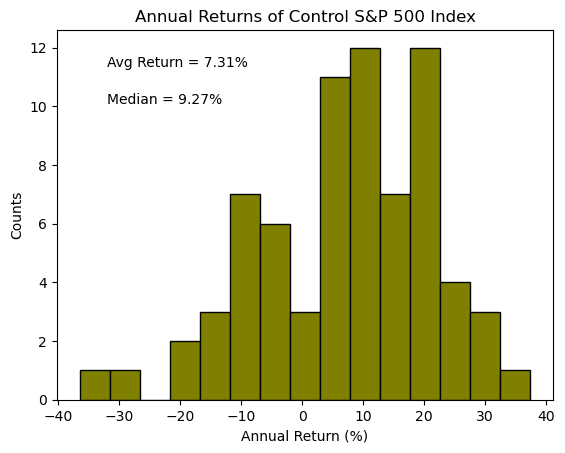

In [19]:
control_result = simulate_control_group(df)
plt.hist(x = control_result["(%)Annual_Return_Without_Dividends"], bins = 15,edgecolor = 'black',color='olive')
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Control S&P 500 Index")
plt.text(0.1, 0.9, f'Avg Return = {control_result["(%)Annual_Return_Without_Dividends"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'Median = {control_result["(%)Annual_Return_Without_Dividends"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

### 3.1.2. Statistical Comparison

In [20]:
df1 = trade_results_35["(%)Annual_Return_Without_Dividends"].to_frame("3-5 EMA")
df2 = trade_results_58["(%)Annual_Return_Without_Dividends"].to_frame("5-8 EMA")
df3 = control_result["(%)Annual_Return_Without_Dividends"].to_frame("Control")

# Sonra concat fonksiyonu ile DataFrame'leri birleştiriyoruz
joinDF = pd.concat([df1, df2, df3], axis=1)
joinDF.head()

,3-5 EMA,5-8 EMA,Control
Period,,,
1950,4.364200,7.421474,16.918224
1951,11.512577,11.805429,10.367898
1952,17.010826,13.438493,7.597164
1953,0.577065,1.583874,-5.254217
1954,36.088616,33.261157,37.407386


In [21]:
stats.wilcoxon(joinDF["3-5 EMA"],joinDF["Control"])

WilcoxonResult(statistic=1274.0, pvalue=0.6740741905883685)

In [22]:
stats.ttest_rel(joinDF["5-8 EMA"],joinDF["Control"])

TtestResult(statistic=-1.1341595679430996, pvalue=0.2604896716412202, df=72)

In [23]:
stats.wilcoxon(joinDF["5-8 EMA"],joinDF["3-5 EMA"])

WilcoxonResult(statistic=901.0, pvalue=0.013467877502082545)

## 3.2. Trading Gold

### 3.2.1. Trading Simulations

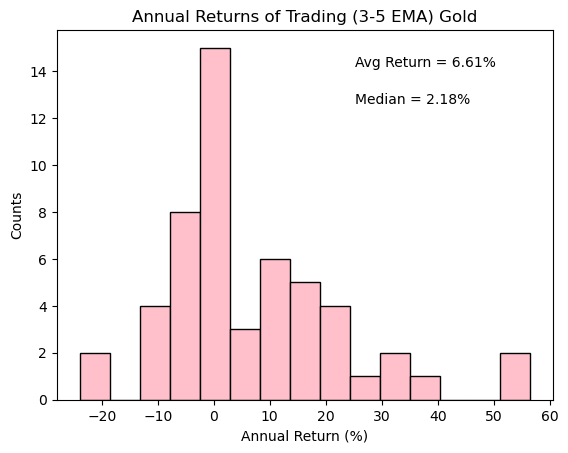

In [24]:
trade_results_35_gold =  simulate_trade_EMA_gold(df_gold.set_index("Date"),verbose=False,EMA1 = 3,EMA2 = 5)
plt.hist(x = trade_results_35_gold["(%)Annual_Return"], bins = 15,edgecolor = 'black',color='pink')
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (3-5 EMA) Gold")
plt.text(0.6, 0.9, f'Avg Return = {trade_results_35_gold["(%)Annual_Return"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Median = {trade_results_35_gold["(%)Annual_Return"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

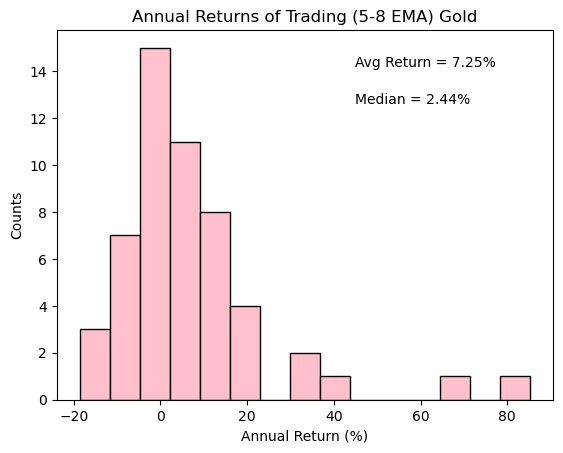

In [25]:
trade_results_58_gold =  simulate_trade_EMA_gold(df_gold.set_index("Date"),verbose=False,EMA1 = 5,EMA2 = 8)
plt.hist(x = trade_results_58_gold["(%)Annual_Return"], bins = 15,edgecolor = 'black',color='pink')
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Trading (5-8 EMA) Gold")
plt.text(0.6, 0.9, f'Avg Return = {trade_results_58_gold["(%)Annual_Return"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.6, 0.8, f'Median = {trade_results_58_gold["(%)Annual_Return"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

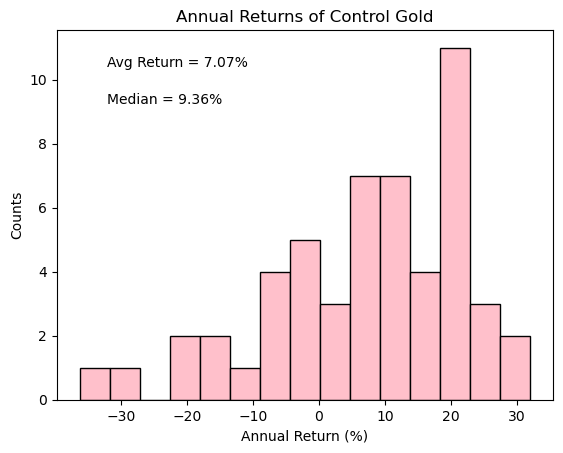

In [26]:
control_result = simulate_control_group_gold(df)
plt.hist(x = control_result["(%)Annual_Return"], bins = 15,edgecolor = 'black',color='pink')
plt.xlabel("Annual Return (%)")
plt.title("Annual Returns of Control Gold")
plt.text(0.1, 0.9, f'Avg Return = {control_result["(%)Annual_Return"].mean():.2f}%', transform=plt.gca().transAxes)
plt.text(0.1, 0.8, f'Median = {control_result["(%)Annual_Return"].median():.2f}%', transform=plt.gca().transAxes)
plt.ylabel("Counts")
plt.show()

### 3.2.2. Statistical Comparison

In [27]:
stats.wilcoxon(x = control_result["(%)Annual_Return"],y = trade_results_58_gold["(%)Annual_Return"])

WilcoxonResult(statistic=608.0, pvalue=0.34126325404775515)

In [28]:
stats.wilcoxon(x = control_result["(%)Annual_Return"],y = trade_results_35_gold["(%)Annual_Return"])

WilcoxonResult(statistic=651.0, pvalue=0.5679973936337135)

In [29]:
stats.wilcoxon(x = trade_results_58_gold["(%)Annual_Return"],y = trade_results_35_gold["(%)Annual_Return"])

WilcoxonResult(statistic=697.0, pvalue=0.8699073712236178)